# NLP (Natural Language Processing)

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                   
import re
import string
import nltk

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Examining the dataframe
df = pd.read_csv('04_train.csv',encoding= 'unicode_escape',nrows=3530)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# Gives a glance about the datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3530 non-null   object
 1   comment_text   3530 non-null   object
 2   toxic          3530 non-null   int64 
 3   severe_toxic   3530 non-null   int64 
 4   obscene        3530 non-null   int64 
 5   threat         3530 non-null   int64 
 6   insult         3530 non-null   int64 
 7   identity_hate  3530 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 220.8+ KB


In [4]:
# Prints first 10 rows of the dataset
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
# About the datatypes 
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [6]:
# remove special characters, numbers and punctuations
df['clean_comment'] = df['comment_text'].str.replace("[^a-zA-Z]", " ")
df.head()

C:\Users\nisho\AppData\Local\Temp/ipykernel_18060/2404741115.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_comment'] = df['comment_text'].str.replace("[^a-zA-Z]", " ")


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...


In [7]:
# remove short words
df['clean_comment'] = df['clean_comment'].apply(lambda x: " ".join([w for w in str(x).split() if len(w)>2]))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under username ...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww matches this background colour seemingly s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man really not trying edit war just that t...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More can make any real suggestions improvement...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are hero Any chance you remember what ...


In [8]:
# Individual words considered as tokens
tokenized_tweet = df['clean_comment'].apply(lambda x: str(x).split())
tokenized_tweet.head()

0    [Explanation, Why, the, edits, made, under, us...
1    [aww, matches, this, background, colour, seemi...
2    [Hey, man, really, not, trying, edit, war, jus...
3    [More, can, make, any, real, suggestions, impr...
4    [You, sir, are, hero, Any, chance, you, rememb...
Name: clean_comment, dtype: object

In [9]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [explan, whi, the, edit, made, under, usernam,...
1    [aww, match, thi, background, colour, seemingl...
2    [hey, man, realli, not, tri, edit, war, just, ...
3    [more, can, make, ani, real, suggest, improv, ...
4    [you, sir, are, hero, ani, chanc, you, rememb,...
Name: clean_comment, dtype: object

In [10]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nisho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
df['clean_comment'] = tokenized_tweet
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan whi the edit made under usernam hardcor...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match thi background colour seemingli stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man realli not tri edit war just that thi ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more can make ani real suggest improv wonder t...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are hero ani chanc you rememb what pag...


In [12]:
!pip install wordcloud

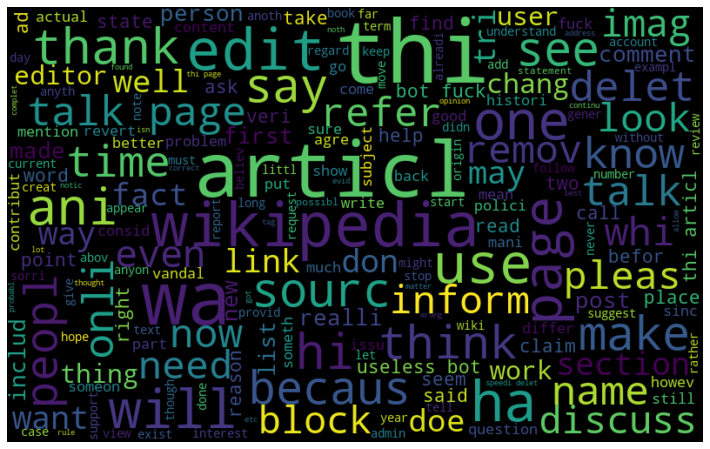

In [13]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_comment']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explan whi the edit made under usernam hardcor...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,aww match thi background colour seemingli stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man realli not tri edit war just that thi ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,more can make ani real suggest improv wonder t...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are hero ani chanc you rememb what pag...
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,congratul from well use the tool well talk
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,cocksuck befor you piss around work
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,your vandal the matt shirvington articl ha bee...
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,sorri the word nonsens wa offens you anyway no...
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,align thi subject and which are contrari those...


# Vectorization

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,
max_features=1500, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_comment'])

In [18]:
import pickle
pickle.dump(bow_vectorizer,open('bow_sentiment',"wb"))

# Correlation and Covariance among various classes

In [19]:
df.corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.314771,0.658046,0.192070,0.664178,0.294231
severe_toxic,0.314771,1.000000,0.445161,0.116443,0.373481,0.232404
obscene,0.658046,0.445161,1.000000,0.175852,0.729353,0.353229
threat,0.192070,0.116443,0.175852,1.000000,0.175343,0.257193
insult,0.664178,0.373481,0.729353,0.175343,1.000000,0.389884
identity_hate,0.294231,0.232404,0.353229,0.257193,0.389884,1.000000


<AxesSubplot:>

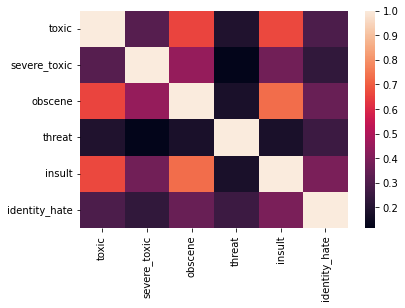

In [20]:
sns.heatmap(df.corr())

In [21]:
df.cov()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,0.092959,0.010159,0.045619,0.003810,0.046156,0.008890
severe_toxic,0.010159,0.011206,0.010715,0.000802,0.009012,0.002438
obscene,0.045619,0.010715,0.051700,0.002601,0.037799,0.007959
threat,0.003810,0.000802,0.002601,0.004232,0.002600,0.001658
insult,0.046156,0.009012,0.037799,0.002600,0.051952,0.008806
identity_hate,0.008890,0.002438,0.007959,0.001658,0.008806,0.009819


<AxesSubplot:>

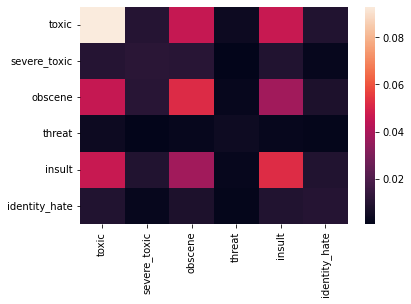

In [22]:
sns.heatmap(df.cov())

# About the label 'toxic'

In [23]:
# Splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['toxic'], random_state=42, test_size=0.2,stratify=df['toxic'])

In [24]:
# Gives the frequency of each class in the toxic feature
df['toxic'].value_counts()

0    3164
1     366
Name: toxic, dtype: int64

# Handling Imbalance in the dataset using SMOTE

In [25]:
# Handling class imbalance 
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 633, 1: 73})


In [26]:
#import collections as k
#from imblearn.over_sampling import ADASYN
#X_train, y_train  = ADASYN().fit_resample(X_train, y_train)
#print('Original dataset shape', k.Counter(y_train))
#print('Resample dataset shape', k.Counter(y_nm))

In [27]:
# Importing the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [28]:
model_toxic = LogisticRegression(max_iter=10000)
model_toxic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
pred = model_toxic.predict(X_test)
accuracy_score(y_test,pred)

0.8441926345609065

In [30]:
model_toxic_1 = KNeighborsClassifier()
model_toxic_1.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
pred_1 = model_toxic_1.predict(X_test)
accuracy_score(y_test,pred_1)

0.4121813031161473

In [32]:
model_toxic_2 = SVC()
model_toxic_2.fit(X_train, y_train)

SVC()

In [33]:
pred_2 = model_toxic_2.predict(X_test)
accuracy_score(y_test,pred_2)

0.7464589235127479

In [34]:
model_toxic_3 = DecisionTreeClassifier()
model_toxic_3.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
pred_3 = model_toxic_3.predict(X_test)
accuracy_score(y_test,pred_3)

0.8229461756373938

In [36]:
model_toxic_4 = RandomForestClassifier()
model_toxic_4.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
pred_4 = model_toxic_4.predict(X_test)
accuracy_score(y_test,pred_4)

0.8682719546742209

In [38]:
# Logistic Regression is used to find out the probability for a sentence to be toxic and stored that in a list 'a'
a=[]
for i in range(len(model_toxic.predict_proba(X_test))):
      a.append(model_toxic.predict_proba(X_test)[i][1])

In [39]:
# Random Forest Classifier is used to find out the probability for a sentence to be toxic and stored that in a list 'b'
b=[]
for i in range(len(model_toxic_4.predict_proba(X_test))):
      b.append(model_toxic_4.predict_proba(X_test)[i][1])

# Proposed algorithm

In [40]:
# Found out the geometric mean and harmonic mean of probabilities of Logistic Regression and probabilities of Random Forest and stored the 
# values in 'c' and 'd' respectively
a=np.array(a)
b=np.array(b)
c=(a*b)**0.50
d=(2*a*b)/(a+b)

In [41]:
# Fixed a threshold value of 0.75 to decide the class based on new probabilities
e=[]
for i in range(len(c)):
  if c[i]>0.75:
    e.append(1)
  else:
    e.append(0)

In [42]:
f=[]
for i in range(len(d)):
  if d[i]>0.7:
    f.append(1)
  else:
    f.append(0)

In [43]:
# Evaluated the accuracy score and ROC AUC scores for the newly designed algorithm
print("Accuracy = " + str(accuracy_score(y_test,e)))
print("ROC AUC score = " + str(roc_auc_score(y_test,e)))

Accuracy = 0.9065155807365439
ROC AUC score = 0.6509554415806444


In [44]:
print("Accuracy = " + str(accuracy_score(y_test,f)))
print("ROC AUC score = " + str(roc_auc_score(y_test,f)))

Accuracy = 0.9022662889518414
ROC AUC score = 0.6667640502932329


# Plotting Confusion Matrices 

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


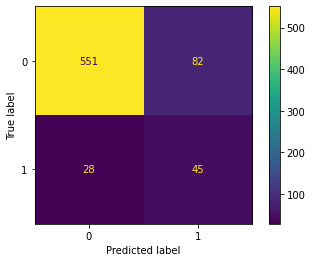

In [45]:
# Plotting the confusion matrices for all the classifiers used
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_toxic, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


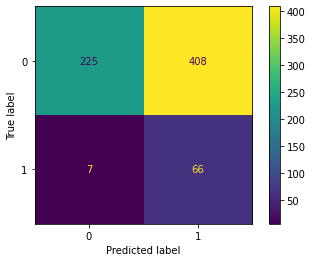

In [46]:
plot_confusion_matrix(model_toxic_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


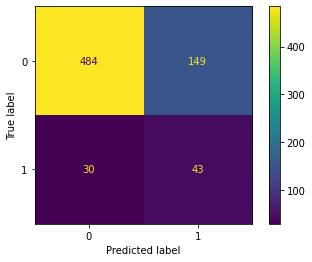

In [47]:
plot_confusion_matrix(model_toxic_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


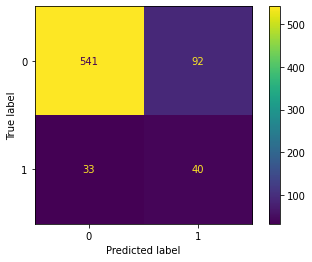

In [48]:
plot_confusion_matrix(model_toxic_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


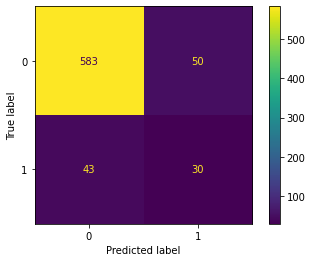

In [49]:
plot_confusion_matrix(model_toxic_4, X_test, y_test) 
plt.show()

# About the label 'severe toxic'

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['severe_toxic'], random_state=42, test_size=0.2)

In [51]:
# Handling class imbalance
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 698, 1: 8})


In [52]:
model_severe_toxic = LogisticRegression(max_iter=10000)
model_severe_toxic.fit(X_train, y_train)
pred = model_severe_toxic.predict(X_test)
accuracy_score(y_test,pred)

0.8980169971671388

In [53]:
model_severe_toxic_1 = KNeighborsClassifier()
model_severe_toxic_1.fit(X_train, y_train)
pred_1 = model_severe_toxic_1.predict(X_test)
accuracy_score(y_test,pred_1)

0.6487252124645893

In [54]:
model_severe_toxic_2 = SVC()
model_severe_toxic_2.fit(X_train, y_train)
pred_2 = model_severe_toxic_2.predict(X_test)
accuracy_score(y_test,pred_2)

0.9277620396600567

In [55]:
model_severe_toxic_3 = DecisionTreeClassifier()
model_severe_toxic_3.fit(X_train, y_train)
pred_3 = model_severe_toxic_3.predict(X_test)
accuracy_score(y_test,pred_3)

0.9008498583569405

In [56]:
model_severe_toxic_4 = RandomForestClassifier()
model_severe_toxic_4.fit(X_train, y_train)
pred_4 = model_severe_toxic_4.predict(X_test)
accuracy_score(y_test,pred_4)

0.9107648725212465

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


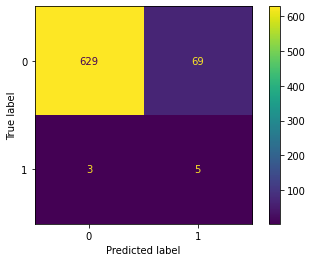

In [57]:
plot_confusion_matrix(model_severe_toxic, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


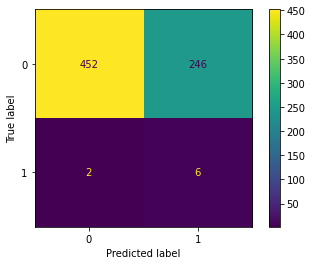

In [58]:
plot_confusion_matrix(model_severe_toxic_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


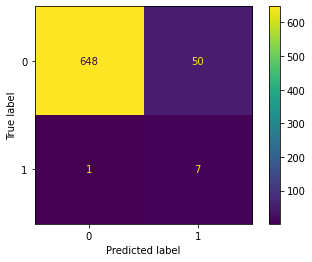

In [59]:
plot_confusion_matrix(model_severe_toxic_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


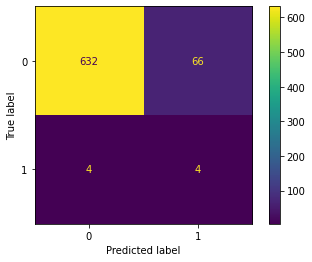

In [60]:
plot_confusion_matrix(model_severe_toxic_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


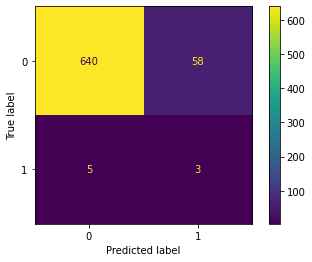

In [61]:
plot_confusion_matrix(model_severe_toxic_4, X_test, y_test) 
plt.show()

# About the label 'obscene'

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['obscene'], random_state=42, test_size=0.2)

In [63]:
# Handling class imbalance 
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 659, 1: 47})


In [64]:
model_obscene = LogisticRegression(max_iter=10000)
model_obscene_1 = KNeighborsClassifier() 
model_obscene_2 = SVC() 
model_obscene_3 = DecisionTreeClassifier()
model_obscene_4 = RandomForestClassifier()

model_obscene.fit(X_train, y_train)
model_obscene_1.fit(X_train, y_train)
model_obscene_2.fit(X_train, y_train)
model_obscene_3.fit(X_train, y_train)
model_obscene_4.fit(X_train, y_train)

pred = model_obscene.predict(X_test)
pred_1 = model_obscene_1.predict(X_test)
pred_2 = model_obscene_2.predict(X_test)
pred_3 = model_obscene_3.predict(X_test)
pred_4 = model_obscene_4.predict(X_test)

print("Logistic Regression Accuracy = " + str(accuracy_score(y_test,pred)))
print("KNN Accuracy = " + str(accuracy_score(y_test,pred_1)))
print("SVC Accuracy = " + str(accuracy_score(y_test,pred_2)))
print("Decision Tree Accuracy = " + str(accuracy_score(y_test,pred_3)))
print("Random Forest Accuracy = " + str(accuracy_score(y_test,pred_4)))

Logistic Regression Accuracy = 0.876770538243626
KNN Accuracy = 0.4702549575070821
SVC Accuracy = 0.7535410764872521
Decision Tree Accuracy = 0.8626062322946175
Random Forest Accuracy = 0.8838526912181303


c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


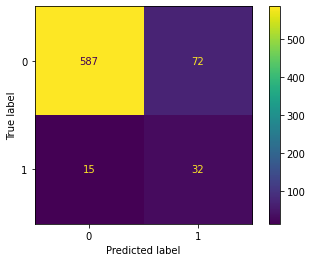

In [65]:
plot_confusion_matrix(model_obscene, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


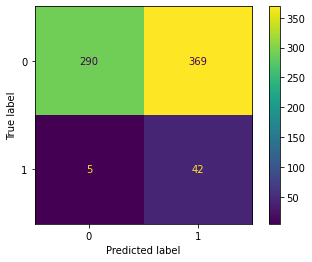

In [66]:
plot_confusion_matrix(model_obscene_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


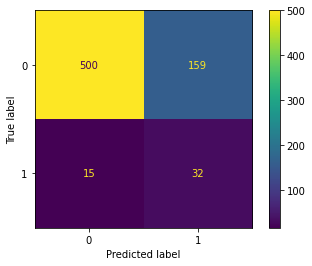

In [67]:
plot_confusion_matrix(model_obscene_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


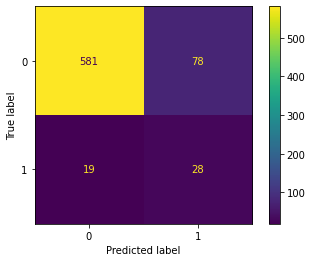

In [68]:
plot_confusion_matrix(model_obscene_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


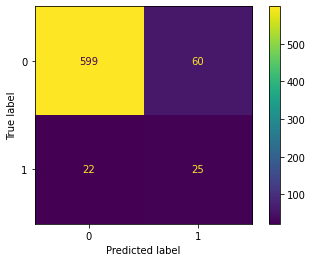

In [69]:
plot_confusion_matrix(model_obscene_4, X_test, y_test) 
plt.show()

# About the label 'threat'

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['threat'], random_state=42, test_size=0.2)

In [71]:
# Handling class imbalance 
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 703, 1: 3})


In [72]:
model_threat = LogisticRegression(max_iter=10000)
model_threat_1 = KNeighborsClassifier() 
model_threat_2 = SVC() 
model_threat_3 = DecisionTreeClassifier()
model_threat_4 = RandomForestClassifier()
model_threat.fit(X_train, y_train)
model_threat_1.fit(X_train, y_train)
model_threat_2.fit(X_train, y_train)
model_threat_3.fit(X_train, y_train)
model_threat_4.fit(X_train, y_train)
pred =model_threat.predict(X_test)
pred_1 = model_threat_1.predict(X_test)
pred_2 = model_threat_2.predict(X_test)
pred_3 = model_threat_3.predict(X_test)
pred_4 = model_threat_4.predict(X_test)
print("Logistic Regression Accuracy = " + str(accuracy_score(y_test,pred)))
print("KNN Accuracy = " + str(accuracy_score(y_test,pred_1)))
print("SVC Accuracy = " + str(accuracy_score(y_test,pred_2)))
print("Decision Tree Accuracy = " + str(accuracy_score(y_test,pred_3)))
print("Random Forest Accuracy = " + str(accuracy_score(y_test,pred_4)))

Logistic Regression Accuracy = 0.8895184135977338
KNN Accuracy = 0.6558073654390935
SVC Accuracy = 0.9050991501416431
Decision Tree Accuracy = 0.9235127478753541
Random Forest Accuracy = 0.9135977337110481


c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


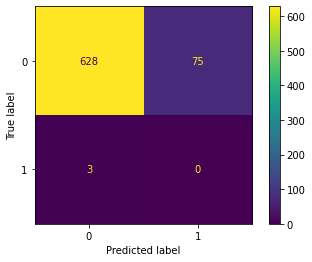

In [73]:
plot_confusion_matrix(model_threat, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


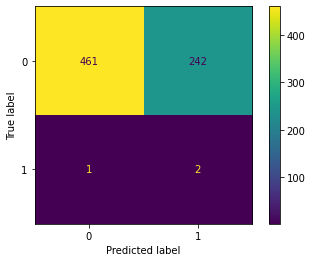

In [74]:
plot_confusion_matrix(model_threat_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


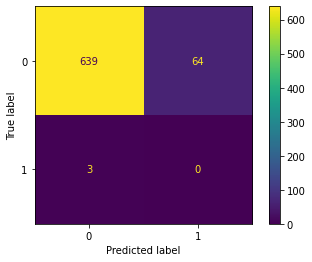

In [75]:
plot_confusion_matrix(model_threat_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


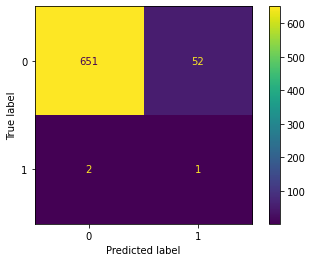

In [76]:
plot_confusion_matrix(model_threat_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


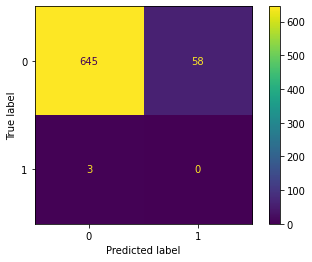

In [77]:
plot_confusion_matrix(model_threat_4, X_test, y_test) 
plt.show()

# About the label 'insult'

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['insult'], random_state=42, test_size=0.2)

In [79]:
# Handling class imbalance 
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 669, 1: 37})


In [80]:
model_insult = LogisticRegression(max_iter=10000)
model_insult.fit(X_train, y_train)
pred = model_insult.predict(X_test)
accuracy_score(y_test,pred)

model_insult = LogisticRegression(max_iter=10000)
model_insult_1 = KNeighborsClassifier() 
model_insult_2 = SVC() 
model_insult_3 = DecisionTreeClassifier()
model_insult_4 = RandomForestClassifier()
model_insult.fit(X_train, y_train)
model_insult_1.fit(X_train, y_train)
model_insult_2.fit(X_train, y_train)
model_insult_3.fit(X_train, y_train)
model_insult_4.fit(X_train, y_train)
pred = model_insult.predict(X_test)
pred_1 = model_insult_1.predict(X_test)
pred_2 = model_insult_2.predict(X_test)
pred_3 = model_insult_3.predict(X_test)
pred_4 = model_insult_4.predict(X_test)
print("Logistic Regression Accuracy = " + str(accuracy_score(y_test,pred)))
print("KNN Accuracy = " + str(accuracy_score(y_test,pred_1)))
print("SVC Accuracy = " + str(accuracy_score(y_test,pred_2)))
print("Decision Tree Accuracy = " + str(accuracy_score(y_test,pred_3)))
print("Random Forest Accuracy = " + str(accuracy_score(y_test,pred_4)))

Logistic Regression Accuracy = 0.8356940509915014
KNN Accuracy = 0.38526912181303113
SVC Accuracy = 0.6855524079320113
Decision Tree Accuracy = 0.8059490084985835
Random Forest Accuracy = 0.8470254957507082


c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


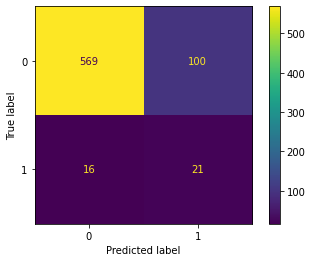

In [81]:
plot_confusion_matrix(model_insult, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


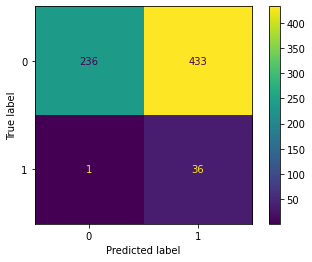

In [82]:
plot_confusion_matrix(model_insult_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


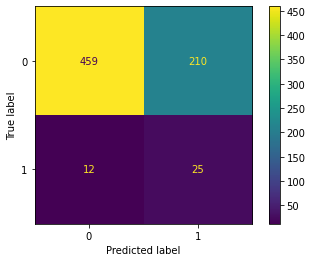

In [83]:
plot_confusion_matrix(model_insult_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


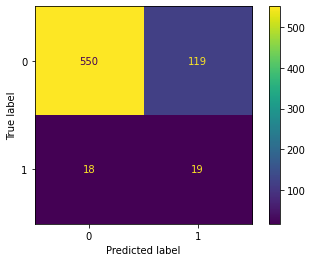

In [84]:
plot_confusion_matrix(model_insult_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


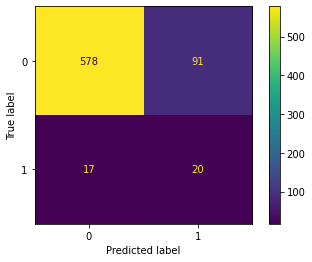

In [85]:
plot_confusion_matrix(model_insult_4, X_test, y_test) 
plt.show()

# About the label 'identity hate'

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['identity_hate'], random_state=42, test_size=0.2)

In [87]:
# Handling class imbalance 
import collections as k
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

print('Original dataset shape', k.Counter(y_test))

Original dataset shape Counter({0: 694, 1: 12})


In [88]:
model_identity_hate = LogisticRegression(max_iter=10000)
model_identity_hate_1 = KNeighborsClassifier() 
model_identity_hate_2 = SVC() 
model_identity_hate_3 = DecisionTreeClassifier()
model_identity_hate_4 = RandomForestClassifier()
model_identity_hate.fit(X_train, y_train)
model_identity_hate_1.fit(X_train, y_train)
model_identity_hate_2.fit(X_train, y_train)
model_identity_hate_3.fit(X_train, y_train)
model_identity_hate_4.fit(X_train, y_train)
pred = model_identity_hate.predict(X_test)
pred_1 = model_identity_hate_1.predict(X_test)
pred_2 = model_identity_hate_2.predict(X_test)
pred_3 = model_identity_hate_3.predict(X_test)
pred_4 = model_identity_hate_4.predict(X_test)
print("Logistic Regression Accuracy = " + str(accuracy_score(y_test,pred)))
print("KNN Accuracy = " + str(accuracy_score(y_test,pred_1)))
print("SVC Accuracy = " + str(accuracy_score(y_test,pred_2)))
print("Decision Tree Accuracy = " + str(accuracy_score(y_test,pred_3)))
print("Random Forest Accuracy = " + str(accuracy_score(y_test,pred_4)))

Logistic Regression Accuracy = 0.8739376770538244
KNN Accuracy = 0.5198300283286119
SVC Accuracy = 0.7280453257790368
Decision Tree Accuracy = 0.8838526912181303
Random Forest Accuracy = 0.9050991501416431


c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


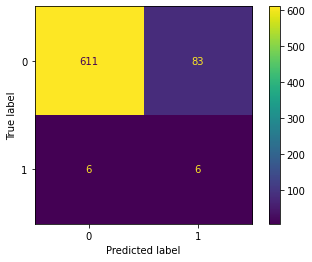

In [89]:
plot_confusion_matrix(model_identity_hate, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


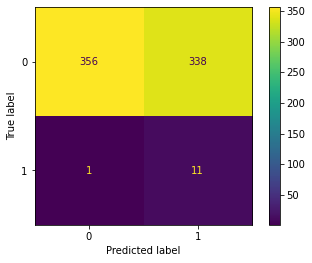

In [90]:
plot_confusion_matrix(model_identity_hate_1, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


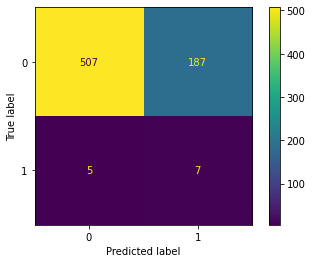

In [91]:
plot_confusion_matrix(model_identity_hate_2, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


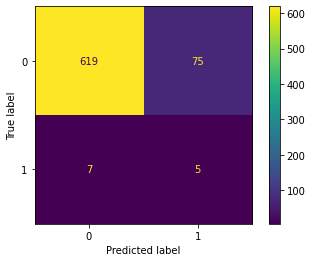

In [92]:
plot_confusion_matrix(model_identity_hate_3, X_test, y_test) 
plt.show()

c:\Users\nisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


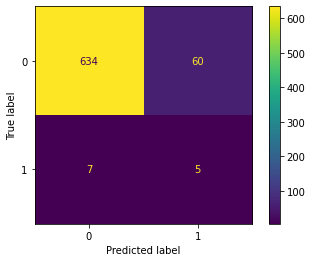

In [93]:
plot_confusion_matrix(model_identity_hate_4, X_test, y_test) 
plt.show()

# Predictions on the test dataset

In [94]:
df1 = pd.read_csv('03_test.csv',encoding= 'unicode_escape',nrows=3530)
df1.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [95]:
from csv import writer
List=[6,'William',5532,1,'UAE']
with open('output.csv', 'a') as f_object:
    writer_object = writer(f_object)
    writer_object.writerow(List)
    f_object.close()

In [96]:
len(df1["id"])

3530

In [97]:
for i in range(0,len(df1["id"])):
  text = df1["comment_text"]

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Generating the final submission file

In [99]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import pickle
import joblib
import re
from csv import writer

stemmer = PorterStemmer()
cv = pickle.load(open('bow_sentiment',"rb"))
classifier = model_toxic


def processText(text):
    text = text.lower()
    text = re.sub('((www.[^s]+)|(https?://[^s]+))','',text)
    text = re.sub('@[^s]+','',text)
    text = re.sub(r'#([^s]+)', r'1', text)
    return text
 
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems
 

for i in range(0,len(df1["id"])):
  list_pred = []
  new = []
  text = df1["comment_text"][i]
  new.append(df1["id"][i])
  print(processText(text))
  tokenized_tweet = " ".join(stem_words(processText(text)))
  tokenized_tweet = " ".join([w for w in str(tokenized_tweet).split() if len(w)>2])
  list_pred = [tokenized_tweet]
  print(list_pred)
  X_fresh = cv.transform(list_pred)
  y_pred_probability = model_toxic.predict_proba(X_fresh)
  y_pred = model_toxic.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  y_pred_probability = model_severe_toxic.predict_proba(X_fresh)
  y_pred = model_severe_toxic.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  y_pred_probability = model_obscene.predict_proba(X_fresh)
  y_pred = model_obscene.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  y_pred_probability = model_threat.predict_proba(X_fresh)
  y_pred = model_threat.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  y_pred_probability = model_insult.predict_proba(X_fresh)
  y_pred = model_insult.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  y_pred_probability = model_identity_hate.predict_proba(X_fresh)
  y_pred = model_identity_hate.predict(X_fresh)
  new.append(y_pred_probability[0][1])

  print(new)
  with open('output.csv', 'a') as f_object:
    writer_object = writer(f_object)
    writer_object.writerow(new)
    f_object.close()

yo bitch ja rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,
["bitch rule more succes then you 'll ever what with you and hate you sad mofucka ... should bitch slap pethed white face and get you kiss ass you guy sicken rule about pride music man dont diss that shit him and nothin wrong bein like tupac brother too ... fuckin white boy get thing right next time."]
['00001cee341fdb12', 0.8073114815880466, 2.6426011091637998e-08, 0.7007250603533677, 1.1134350788642117e-05, 0.3809865737774098, 3.1976504440422336e-06]
== from rfc == 

 the title is fine as it is, imo.
['from rfc the titl fine imo']
['0000247867823ef7', 0.6782457234709681, 0.4999752797196555, 0.42065266409590046, 0.670751727